[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/juliopez/Taller-Fundamentos-Data-Science-Python/blob/main/03_Notebooks/03_Sesion_03.ipynb)

<img src=https://upload.wikimedia.org/wikipedia/commons/1/19/UDLA-logo-oficial.jpg width=400/>

# Fundamentos de Data Science con Python
**Dr. Julio Lopez-Nunez (2025)**

## **Sesión 3 – Introducción a Machine Learning (scikit-learn)**  
**Duración total estimada:** 3 h 15 min  


## ⏱️ 1) Introducción y objetivos (15 min)

**Objetivos de la sesión**
- Diferenciar **regresión** vs. **clasificación**.  
- Entrenar modelos básicos con **scikit-learn**.  
- Dividir datos en **train/test**, **evaluar** y **visualizar** resultados.  
- Entender buenas prácticas: reproducibilidad, métricas y reflexión crítica.

> Nota: Este notebook es el complemento práctico del PPT_3.

## ⏱️ 2) ¿Qué es Machine Learning? (25–30 min, en PPT)


**Definición básica:**  
Disciplina de la Inteligencia Artificial que permite a los sistemas **aprender de los datos** y mejorar su desempeño sin ser programados explícitamente.

**Tipos principales de aprendizaje:**
- **Supervisado:** se entrena con datos etiquetados.  
Ej.: predecir notas (regresión) o aprobado/reprobado (clasificación).  
- **No supervisado:** busca patrones en datos sin etiquetas.  
Ej.: agrupar estudiantes con características similares (clustering).  
- **Por refuerzo:** aprender mediante recompensas/castigos.  
Ej.: agentes que aprenden a jugar o conducción autónoma.   

<img src= https://dev.cognitive.la/uploads/machinedeeplearning2_1615223353.jpg  width=600/>

**Ejemplos aplicados en educación:**
- Predicción de riesgo de deserción.  
- Clasificación de estudiantes según rendimiento (`Aprobado` vs `Reprobado`).  
- Agrupación de perfiles de aprendizaje (clustering).

## ⏱️ 3) Paso a paso: Introducción práctica a Machine Learning

En esta sección seguimos un flujo de trabajo **paso a paso** para entrenar y evaluar modelos de Machine Learning con `scikit-learn`.


### 🔹 Paso 1: Importar librerías necesarias
Aquí cargamos las librerías básicas de análisis de datos y machine learning.

```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

### 🔹 Paso 2: Cargar el dataset
Usaremos `datos_estudiantes_practica.csv` (200 registros).

```python
df = pd.read_csv("datos_estudiantes_practica.csv")
df.head()


### 🔹 Paso 3: Exploración inicial
En este paso revisamos la **estructura del dataset**:  
- Número de filas y columnas.  
- Tipos de datos en cada variable.  
- Estadísticas descriptivas (media, mínimo, máximo, etc.).  

Esto nos permite detectar **posibles problemas iniciales** como datos faltantes, tipos de datos incorrectos o valores atípicos.

```python
# Dimensiones del dataset (filas, columnas)
print("Dimensiones:", df.shape)

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Estadísticas descriptivas (para variables numéricas y categóricas)
df.describe(include="all")


### 🔹 Paso 4: Definir variables predictoras (X) y objetivo (y)
En Machine Learning diferenciamos:  
- **Variables predictoras (X):** las características que usamos para entrenar el modelo.  
- **Variable objetivo (y):** lo que queremos predecir.  

En nuestro dataset:  
- Para **regresión**: `y = Nota_Final`  
- Para **clasificación**: `y = Aprobado`  

```python
# Variables predictoras
X = df[["Asistencia_%", "Edad"]]

# Objetivo para regresión
y_reg = df["Nota_Final"]

# Objetivo para clasificación (convertimos a 0 y 1)
y_clf = df["Aprobado"].astype(int)

print("X (variables predictoras):")
print(X.head())

print("\n Objetivo para regresión (Nota_Final):")
print(y_reg.head())

print("\n Objetivo para clasificación (Aprobado codificado):")
print(y_clf.head())


#### 🔹 Paso 4.1: Selección de variables y matriz de correlación

En problemas de Machine Learning, la elección de las **variables predictoras (X)** es un paso crítico.  
No siempre **más variables = mejor modelo**. Incluir variables irrelevantes puede añadir ruido, y omitir variables importantes reduce la capacidad de predicción.

**Algunas técnicas de selección de variables:**
- **Matriz de correlación:** detectar si dos variables están muy relacionadas entre sí (*multicolinealidad*).  
- **Forward / Backward / Stepwise:** métodos automáticos para añadir o eliminar variables según reglas estadísticas.  
- **Importancia de variables (árboles de decisión):** nos indican qué variables aportan más al modelo.  
- **Criterio pedagógico:** no todas las variables son relevantes desde el punto de vista educativo.

---

##### Ejemplo: matriz de correlación
La **correlación** mide la relación lineal entre dos variables:
- Valores cercanos a **+1** → correlación positiva fuerte.  
- Valores cercanos a **–1** → correlación negativa fuerte.  
- Valores cercanos a **0** → poca o ninguna relación lineal.  

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación entre variables numéricas
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


#### 🔹 Paso 4.2: Transformación de variables categóricas

Antes de dividir en entrenamiento y prueba, debemos **preparar las variables** para que los modelos puedan trabajar correctamente:

**Transformación de variables categóricas a numéricas**  
   - Los algoritmos de Machine Learning no pueden trabajar con texto directamente.  
   - Debemos convertir categorías a números (ej.: *Carrera = Ingeniería / Pedagogía / Derecho*).  
   - Estrategias comunes:
     - **Label Encoding** → asigna un número a cada categoría (útil en árboles).  
     - **One-Hot Encoding** → crea columnas binarias (útil en regresión y modelos lineales).  

---

```python
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# ============================================================
# 1) Label Encoding
# ============================================================
# Convierte cada categoría a un número entero (0, 1, 2...)
# Útil en árboles de decisión o cuando hay muchas categorías.
# Riesgo: introduce un "orden artificial" en las categorías.

le = LabelEncoder()
df["Carrera_Label"] = le.fit_transform(df["Carrera"])

print("\n📌 Dataset con Label Encoding")
print(df[["Carrera", "Carrera_Label"]])

# ============================================================
# 2) One-Hot Encoding
# ============================================================
# Crea una columna binaria (0/1) por cada categoría.
# No introduce orden, pero aumenta el número de columnas.
# drop_first=True evita multicolinealidad eliminando una categoría.

df_onehot = pd.get_dummies(df, columns=["Carrera"], drop_first=True)

print("\n📌 Dataset con One-Hot Encoding")
print(df_onehot)


#### 🔹 Paso 4.3: Normalización y Estandarización:
**Ambas técnicas son importantes, especialmente para ejecutar modelos de machine learning**  
   - **Propósito General**: Evitar que características con rangos muy grandes (como los ingresos) eclipsen o "ensombrezcan" a características con rangos pequeños (como la edad) durante el análisis o la visualización.
- **Normalización (Min-Max)**:
    - Fija un rango predefinido (generalmente 0 a 1).
    - Mantiene las diferencias relativas.
    - Se pueden usar transformaciones no lineales como la raíz cuadrada o el logaritmo natural (normalización logarítmica) para hacer más obvios los datos, dependiendo del problema.
    - La fórmula es:

$$X' = \frac{X - X_{\min}}{X_{\max} - X_{\min}}$$



- **Estandarización (Standardization)**:
    - Busca que la distribución de los datos tenga una media de cero y una desviación estándar de uno.
    - Esto es crucial porque muchos algoritmos (como los métodos de descenso de gradiente) funcionan mejor o asumen distribuciones casi normales.
    - Implica restar la media y dividir por la desviación estándar
$$X_{\text{est}} = \frac{X - \mu}{\sigma}$$

---
```python
from sklearn.preprocessing import StandardScaler

# 🔹 Estandarización de variables numéricas
scaler = StandardScaler()
df_prep[["Edad", "Asistencia_%"]] = scaler.fit_transform(df_prep[["Edad", "Asistencia_%"]])

df_prep[["Edad", "Asistencia_%"]].describe()

### 🔹 Paso 5: Dividir en entrenamiento y prueba
Para evaluar correctamente un modelo de Machine Learning, necesitamos **separar los datos** en dos conjuntos:  

- **Train (entrenamiento, ~80%)** → el modelo aprende los patrones.  
- **Test (prueba, ~20%)** → el modelo se evalúa en datos que no ha visto.  

Esto permite medir la **capacidad de generalización** del modelo y evitar sobreajuste (*overfitting*).

```python
from sklearn.model_selection import train_test_split

# División para regresión (y = Nota_Final)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

# División para clasificación (y = Aprobado)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

print("\nClasificación -> train:", Xc_train.shape, " test:", Xc_test.shape)


#### 🔹 Nota: Underfitting vs. Overfitting

En Machine Learning, el reto no es solo entrenar un modelo, sino lograr que **generalice bien** a datos nuevos:

- **Underfitting (subajuste):** el modelo es demasiado simple y no capta los patrones de los datos.  
  *Ejemplo: usar una recta para un patrón claramente curvo.*  
- **Overfitting (sobreajuste):** el modelo es demasiado complejo y se ajusta incluso al “ruido” de los datos.  
  *Ejemplo: memorizar cada punto en lugar de aprender la tendencia general.*  
- **Modelo correcto:** encuentra un equilibrio: suficientemente flexible para aprender, pero sin sobreentrenarse.  

Este equilibrio es lo que buscamos al ajustar algoritmos de Machine Learning.

<img src= https://www.aprendemachinelearning.com/wp-content/uploads/2017/12/generalizacion-machine-learning.png  width=600/>




### 🔹 Paso 6: Entrenar un modelo de regresión lineal

**Idea:** La regresión lineal busca la mejor recta que relacione las variables predictoras (**X**) con la variable objetivo (**y**).

**Fórmula general:**

$$
y = b_0 + b_1 x_1 + b_2 x_2 + \cdots + b_n x_n
$$


**Donde:**

$$(b_0): intercepto \ (valor \ base).$$
$$(b_i): coeficiente \ de \ cada\ variable\ predictora.$$


En nuestro caso, queremos predecir **Nota_Final** usando **Asistencia_%** y **Edad**.
```python
from sklearn.linear_model import LinearRegression

# Crear el modelo
linreg = LinearRegression()

# Entrenar (ajustar) el modelo con los datos de entrenamiento
linreg.fit(X_train, y_train)

# Mostrar intercepto y coeficientes
print("Intercepto (b0):", linreg.intercept_)
print("Coeficientes (b1, b2):", dict(zip(X.columns, linreg.coef_)))

#### 🔹 Nota: ¿Qué significan intercepto y coeficientes?

- **Intercepto (b₀):** es el valor esperado de la variable objetivo (**Nota_Final**) cuando todas las variables predictoras valen 0.  
  - Ejemplo: si `b₀ = 3.2`, significa que un estudiante con `Asistencia_% = 0` y `Edad = 0` tendría nota 3.2 (no realista, pero útil matemáticamente como “punto de inicio”).  

- **Coeficientes (bᵢ):** indican cuánto cambia la **Nota_Final** si la variable predictora aumenta en 1 unidad, manteniendo las demás constantes.  
  - Ejemplo: si el coeficiente de `Asistencia_%` es 0.05 → por cada 1% adicional de asistencia, la nota final sube en promedio 0.05 puntos.  
  - Si el coeficiente de `Edad` es negativo → a mayor edad, la nota tendería a ser menor (según los datos).

### 🔹 Paso 7: Evaluar el modelo de regresión
Una vez entrenado el modelo, debemos comprobar **qué tan bien predice**.  
- Calculamos el **RMSE (Root Mean Squared Error)** → mide el error promedio entre valores reales y predichos.  
- Graficamos **Real vs. Predicho** → idealmente los puntos deberían alinearse con la recta \(y = x\).

```python
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en test:", round(rmse, 3))

# Gráfico: valores reales vs. predichos
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Nota_Final real")
plt.ylabel("Nota_Final predicha")
plt.title("Regresión lineal: Real vs. Predicho")

# Línea ideal y=x
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "r--")
plt.show()


#### 🔹 Paso 7.1: Comparar diferentes modelos de regresión

Hasta ahora hemos usado **Regresión Lineal**.  
Pero en Machine Learning existen muchos algoritmos que podemos aplicar al mismo problema y comparar su desempeño.

Algunos ejemplos:
- Árboles de regresión  
- Máquinas de soporte vectorial (SVR)  
- K-Vecinos más cercanos (KNN)  
- Regresión bayesiana  
- Regularización (Lasso, Ridge, etc.)

En este ejemplo vamos a entrenar **varios modelos de regresión** y comparar su rendimiento en el conjunto de prueba.

---
```python
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Lista de modelos a evaluar
modelos = [
    ("LinearRegression", LinearRegression()),
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("SVR", SVR()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("SGDRegressor", SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)),
    ("BayesianRidge", BayesianRidge()),
    ("LassoLars", LassoLars())
]

# Evaluar cada modelo
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    score = modelo.score(X_test, y_test)  # R^2
    print(f"El rendimiento del modelo {nombre} es {score*100:.2f}%")


### 🔹 Paso 8: Entrenar un modelo de clasificación (Árbol de decisión)
Ahora queremos **predecir la clase `Aprobado` (0/1)** a partir de las variables **Asistencia_%** y **Edad**.  
Usaremos un **Árbol de Decisión**, que aprende reglas del tipo “si… entonces…”.

**Idea clave:** el árbol divide el espacio de datos en regiones usando umbrales (p. ej., `Asistencia_% >= 75`).

```python
from sklearn.tree import DecisionTreeClassifier

# Recordatorio: en el Paso 4 definimos y_clf = df["Aprobado"].astype(int)
# y en el Paso 5 hicimos: Xc_train, Xc_test, yc_train, yc_test

clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,       # limitamos la profundidad para evitar sobreajuste
    min_samples_split=10,
    min_samples_leaf=5
)

# Entrenar (ajustar) el modelo
clf.fit(Xc_train, yc_train)

print("Accuracy (train):", round(clf.score(Xc_train, yc_train), 3))
print("Accuracy (test):", round(clf.score(Xc_test, yc_test), 3))

# Importancia de variables (qué tan útiles fueron para dividir)
import numpy as np
import pandas as pd

importancias = pd.Series(clf.feature_importances_, index=Xc_train.columns)
print("\nImportancia de variables:")
print(importancias.sort_values(ascending=False))


### 🔹 Paso 9: Evaluar el modelo de clasificación
Una vez entrenado el árbol de decisión, necesitamos comprobar qué tan bien clasifica a los estudiantes.  
Para esto usamos varias herramientas:  

- **Accuracy:** porcentaje de aciertos globales.  
- **Reporte de clasificación:** incluye precisión (*precision*), exhaustividad (*recall*) y F1-score.  
- **Matriz de confusión:** muestra cuántos casos fueron bien/mal clasificados en cada categoría.

```python
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
yc_pred = clf.predict(Xc_test)

# Métricas básicas
print("Accuracy:", round(accuracy_score(yc_test, yc_pred), 3))
print("\nReporte de clasificación:\n")
print(classification_report(yc_test, yc_pred))

# Matriz de confusión
cm = confusion_matrix(yc_test, yc_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión — Clasificación Aprobado/Reprobado")
plt.show()


#### 🔹 Paso 9.1: Gestión Underfitting vs. Overfitting (regresión con árboles)

En este experimento predecimos `Nota_Final` con `Asistencia_%` y `Edad` usando un **árbol de regresión**:

- **Modelo muy simple** → `max_depth=1` (posible underfitting).
- **Modelo muy complejo** → `max_depth=15` (posible overfitting).
- Luego barreremos la profundidad para ver la **curva de error** y elegiremos la mejor con **validación cruzada**.

> Usa las mismas particiones `X_train, X_test, y_train, y_test` creadas antes (Paso 5).

```python
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1) Demostración rápida
shallow = DecisionTreeRegressor(max_depth=1, random_state=42)
deep    = DecisionTreeRegressor(max_depth=15, random_state=42)

for name, model in [("Muy simple (depth=1)", shallow), ("Muy complejo (depth=15)", deep)]:
    model.fit(X_train, y_train)
    rmse_train = rmse(y_train, model.predict(X_train))
    rmse_test  = rmse(y_test,  model.predict(X_test))
    print(f"{name:25s} -> RMSE train: {rmse_train:.3f} | RMSE test: {rmse_test:.3f}")


### 🔹 **Notas finales** sobre evaluación y ajuste de modelos

1. **Métricas de evaluación según el tipo de problema:**
   - **Regresión:** RMSE, MAE, R².  
   - **Clasificación:** Accuracy, Precision, Recall, F1, AUC-ROC.  
   - **Clustering:** Silhouette Score, Davies-Bouldin, Calinski-Harabasz.  

   Cada métrica responde a **preguntas diferentes** y no siempre coinciden.  
   Elegir la métrica correcta depende del contexto educativo y del tipo de decisión que se quiera apoyar.

2. **El papel de los hiperparámetros:**
   - Los modelos tienen “perillas de ajuste” (ej.: `max_depth` en árboles, `k` en KNN, `C` y `gamma` en SVM).  
   - Estos hiperparámetros afectan directamente si el modelo subajusta (*underfitting*) o sobreajusta (*overfitting*).  
   - Ajustarlos es casi un **arte**: requiere experiencia, criterio y muchas pruebas (validación cruzada, grid search).  

   Aquí es donde el **rol del Data Scientist** es esencial: más allá de aplicar librerías, se necesita juicio crítico para decidir qué modelo y parámetros son más adecuados.

> **El Machine Learning** no es un proceso automático que siempre “da la respuesta correcta”. Es un ciclo de prueba, error y ajuste, en el que las métricas y los hiperparámetros guían al analista para mejorar los modelos.


---

### 📊 Principales métricas de evaluación en Machine Learning

| Tipo de problema | Métrica                | Orientación                                               | Interpretación                                                                 | Rango típico  |
|------------------|------------------------|-----------------------------------------------------------|--------------------------------------------------------------------------------|---------------|
| **Regresión**    | RMSE (Root Mean Squared Error) | Error promedio cuadrático (en la misma escala que la variable objetivo) | Valores más bajos = mejor ajuste                                               | [0, ∞)        |
|                  | MAE (Mean Absolute Error)     | Error absoluto promedio                                   | Valores más bajos = mejor ajuste                                               | [0, ∞)        |
|                  | R² (Coeficiente de determinación) | Proporción de la varianza explicada por el modelo         | 1 = ajuste perfecto, 0 = no mejor que la media, <0 = peor que la media         | (−∞, 1]       |
| **Clasificación**| Accuracy               | Porcentaje de aciertos                                    | % de predicciones correctas sobre el total                                     | [0, 1]        |
|                  | Precision              | Verdaderos positivos / todos los predichos como positivos | Valores altos = menos falsos positivos                                         | [0, 1]        |
|                  | Recall (Sensibilidad)  | Verdaderos positivos detectados / todos los positivos     | Valores altos = menos falsos negativos                                         | [0, 1]        |
|                  | F1-Score               | Media armónica entre Precision y Recall                   | Útil cuando hay clases desbalanceadas                                          | [0, 1]        |
|                  | AUC-ROC                | Área bajo la curva ROC                                    | Probabilidad de ordenar bien positivo vs negativo                              | [0, 1]        |
| **Clustering**   | Silhouette Score       | Separación y cohesión de clusters                         | 1 = clusters bien separados, 0 = mezclados, −1 = mala asignación               | [−1, 1]       |
|                  | Davies-Bouldin Index   | Relación dispersión intra-cluster / separación inter-cluster | Valores más bajos = mejor clustering                                          | [0, ∞)        |
|                  | Calinski-Harabasz Index| Varianza entre clusters vs dentro de clusters             | Valores más altos = mejor clustering                                           | [0, ∞)        |

---


## ⏱️ 4) Actividad práctica (50–60 min)

In [ ]:
# PASO 1
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
#Cargar datos (Ejemplo2.csv)
from google.colab import files
uploaded = files.upload()

Saving datos_estudiantes_practica.csv to datos_estudiantes_practica.csv


In [ ]:
# PASO 2
df = pd.read_csv("datos_estudiantes_practica.csv")
df.head()

,ID,Nombre,Edad,Carrera,Nota_Final,Asistencia_%,Aprobado
0,1,Estudiante1,31,Computación,6.0,88,True
1,2,Estudiante2,20,Matemática,6.3,89,True
2,3,Estudiante3,20,Educación,4.4,98,True
3,4,Estudiante4,24,Computación,6.9,72,True
4,5,Estudiante5,35,Física,5.7,99,True


In [ ]:
# PASO 3
# Dimensiones del dataset (filas, columnas)
print("Dimensiones:", df.shape)

# Tipos de datos por columna
print("\nTipos de datos:")
print(df.dtypes)

# Estadísticas descriptivas (para variables numéricas y categóricas)
df.describe(include="all")

Dimensiones: (200, 7)

Tipos de datos:
ID                int64
Nombre           object
Edad              int64
Carrera          object
Nota_Final      float64
Asistencia_%      int64
Aprobado           bool
dtype: object


,ID,Nombre,Edad,Carrera,Nota_Final,Asistencia_%,Aprobado
count,200.000000,200,200.000000,200,200.000000,200.000000,200
unique,NaN,200,NaN,6,NaN,NaN,2
top,NaN,Estudiante1,NaN,Matemática,NaN,NaN,True
freq,NaN,1,NaN,38,NaN,NaN,156
mean,100.500000,NaN,27.905000,NaN,4.974500,75.890000,NaN
std,57.879185,NaN,6.254725,NaN,1.115266,13.649154,NaN
min,1.000000,NaN,18.000000,NaN,3.000000,50.000000,NaN
25%,50.750000,NaN,22.000000,NaN,4.175000,65.000000,NaN
50%,100.500000,NaN,28.000000,NaN,5.000000,75.000000,NaN
75%,150.250000,NaN,33.000000,NaN,5.900000,87.250000,NaN


In [ ]:
# PASO 4
# Variables predictoras
X = df[["Asistencia_%", "Edad"]]

# Objetivo para regresión
y_reg = df["Nota_Final"]

# Objetivo para clasificación (convertimos a 0 y 1)
y_clf = df["Aprobado"].astype(int)

print("X (variables predictoras):")
print(X.head())

print("\nObjetivo para regresión (Nota_Final):")
print(y_reg.head())

print("\nObjetivo para clasificación (Aprobado codificado):")
print(y_clf.head())

X (variables predictoras):
   Asistencia_%  Edad
0            88    31
1            89    20
2            98    20
3            72    24
4            99    35

Objetivo para regresión (Nota_Final):
0    6.0
1    6.3
2    4.4
3    6.9
4    5.7
Name: Nota_Final, dtype: float64

Objetivo para clasificación (Aprobado codificado):
0    1
1    1
2    1
3    1
4    1
Name: Aprobado, dtype: int64


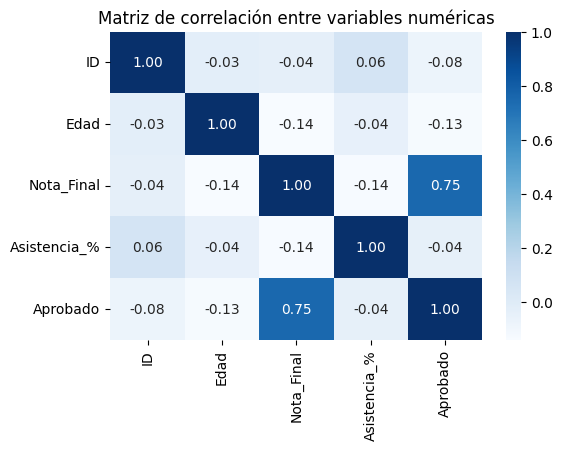

In [ ]:
# PASO 4.1
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de correlación entre variables numéricas
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [ ]:
# PASO 4.2
from sklearn.preprocessing import StandardScaler

# Copia del dataset original para no alterar el df inicial
df_prep = df.copy()

# 🔹 Normalización de variables numéricas
scaler = StandardScaler()
df_prep[["Edad", "Asistencia_%"]] = scaler.fit_transform(df_prep[["Edad", "Asistencia_%"]])

# 🔹 Transformación de variable categórica (ejemplo con 'Carrera')
df_prep = pd.get_dummies(df_prep, columns=["Carrera"], drop_first=True)

print("Primeras filas después de la preparación:")
df_prep.head()

Primeras filas después de la preparación:


,ID,Nombre,Edad,Nota_Final,Asistencia_%,Aprobado,Carrera_Educación,Carrera_Física,Carrera_Ingeniería,Carrera_Matemática,Carrera_Química
0,1,Estudiante1,0.496068,6.0,0.889461,True,False,False,False,False,False
1,2,Estudiante2,-1.267016,6.3,0.962909,True,False,False,False,True,False
2,3,Estudiante3,-1.267016,4.4,1.623946,True,True,False,False,False,False
3,4,Estudiante4,-0.625895,6.9,-0.285715,True,False,False,False,False,False
4,5,Estudiante5,1.137189,5.7,1.697394,True,False,True,False,False,False


In [ ]:
# PASO 5
from sklearn.model_selection import train_test_split

# División para regresión (y = Nota_Final)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_reg, test_size=0.2, random_state=42
)

print("Conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Conjunto de prueba:", X_test.shape, y_test.shape)

# División para clasificación (y = Aprobado)
Xc_train, Xc_test, yc_train, yc_test = train_test_split(
    X, y_clf, test_size=0.2, random_state=42
)

print("\nClasificación -> train:", Xc_train.shape, " test:", Xc_test.shape)

Conjunto de entrenamiento: (160, 2) (160,)
Conjunto de prueba: (40, 2) (40,)

Clasificación -> train: (160, 2)  test: (40, 2)


In [ ]:
# PASO 6
from sklearn.linear_model import LinearRegression

# Crear el modelo
linreg = LinearRegression()

# Entrenar (ajustar) el modelo con los datos de entrenamiento
linreg.fit(X_train, y_train)

# Mostrar intercepto y coeficientes
print("Intercepto (b0):", linreg.intercept_)
print("Coeficientes (b1, b2):", dict(zip(X.columns, linreg.coef_)))

Intercepto (b0): 7.0534391247847665
Coeficientes (b1, b2): {'Asistencia_%': np.float64(-0.01652363324178173), 'Edad': np.float64(-0.029386393069851132)}


RMSE en test: 1.096


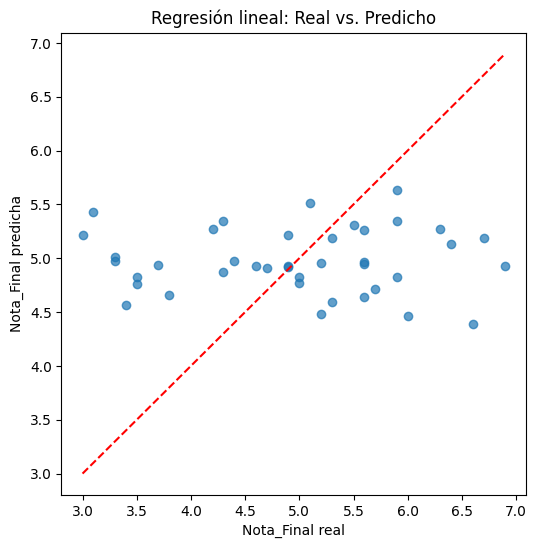

In [ ]:
# PASO 7
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
y_pred = linreg.predict(X_test)

# Calcular RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE en test:", round(rmse, 3))

# Gráfico: valores reales vs. predichos
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Nota_Final real")
plt.ylabel("Nota_Final predicha")
plt.title("Regresión lineal: Real vs. Predicho")

# Línea ideal y=x
lims = [min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max())]
plt.plot(lims, lims, "r--")
plt.show()

In [ ]:
# PASO 7.1
from sklearn.linear_model import LinearRegression, BayesianRidge, LassoLars, SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# Lista de modelos a evaluar
modelos = [
    ("LinearRegression", LinearRegression()),
    ("DecisionTreeRegressor", DecisionTreeRegressor(random_state=42)),
    ("SVR", SVR()),
    ("KNeighborsRegressor", KNeighborsRegressor()),
    ("SGDRegressor", SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)),
    ("BayesianRidge", BayesianRidge()),
    ("LassoLars", LassoLars())
]

# Evaluar cada modelo
for nombre, modelo in modelos:
    modelo.fit(X_train, y_train)
    score = modelo.score(X_test, y_test)  # R^2
    print(f"El rendimiento del modelo {nombre} es {score*100:.2f}%")

El rendimiento del modelo LinearRegression es -8.42%
El rendimiento del modelo DecisionTreeRegressor es -91.26%
El rendimiento del modelo SVR es -1.15%
El rendimiento del modelo KNeighborsRegressor es -16.13%
El rendimiento del modelo SGDRegressor es -110781636845336325538185216.00%
El rendimiento del modelo BayesianRidge es -6.40%
El rendimiento del modelo LassoLars es -3.95%


In [ ]:
# PASO 8
from sklearn.tree import DecisionTreeClassifier

# Recordatorio: en el Paso 4 definimos y_clf = df["Aprobado"].astype(int)
# y en el Paso 5 hicimos: Xc_train, Xc_test, yc_train, yc_test

clf = DecisionTreeClassifier(
    random_state=42,
    max_depth=3,       # limitamos la profundidad para evitar sobreajuste
    min_samples_split=10,
    min_samples_leaf=5
)

# Entrenar (ajustar) el modelo
clf.fit(Xc_train, yc_train)

print("Accuracy (train):", round(clf.score(Xc_train, yc_train), 3))
print("Accuracy (test):", round(clf.score(Xc_test, yc_test), 3))

# Importancia de variables (qué tan útiles fueron para dividir)
import numpy as np
import pandas as pd

importancias = pd.Series(clf.feature_importances_, index=Xc_train.columns)
print("\nImportancia de variables:")
print(importancias.sort_values(ascending=False))

Accuracy (train): 0.781
Accuracy (test): 0.775

Importancia de variables:
Asistencia_%    0.817406
Edad            0.182594
dtype: float64


Accuracy: 0.775

Reporte de clasificación:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.78      1.00      0.87        31

    accuracy                           0.78        40
   macro avg       0.39      0.50      0.44        40
weighted avg       0.60      0.78      0.68        40



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


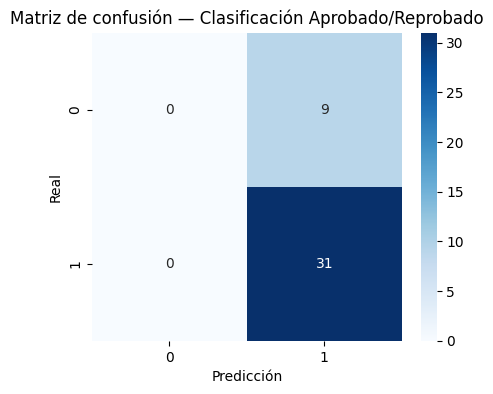

In [ ]:
# PASO 9
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predicciones en el conjunto de prueba
yc_pred = clf.predict(Xc_test)

# Métricas básicas
print("Accuracy:", round(accuracy_score(yc_test, yc_pred), 3))
print("\nReporte de clasificación:\n")
print(classification_report(yc_test, yc_pred))

# Matriz de confusión
cm = confusion_matrix(yc_test, yc_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión — Clasificación Aprobado/Reprobado")
plt.show()

In [ ]:
# PASO 9.1
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1) Demostración rápida
shallow = DecisionTreeRegressor(max_depth=1, random_state=42)
deep    = DecisionTreeRegressor(max_depth=15, random_state=42)

for name, model in [("Muy simple (depth=1)", shallow), ("Muy complejo (depth=15)", deep)]:
    model.fit(X_train, y_train)
    rmse_train = rmse(y_train, model.predict(X_train))
    rmse_test  = rmse(y_test,  model.predict(X_test))
    print(f"{name:25s} -> RMSE train: {rmse_train:.3f} | RMSE test: {rmse_test:.3f}")

Muy simple (depth=1)      -> RMSE train: 1.100 | RMSE test: 1.066
Muy complejo (depth=15)   -> RMSE train: 0.314 | RMSE test: 1.456


## ⏱️ 5) Reflexión Final
Ahora que hemos probado **regresión lineal** y **clasificación con árbol de decisión**, es momento de analizar los resultados y pensar en su aplicación real.

📌 Preguntas para la reflexión:
- ¿Qué variable(s) explican mejor la **Nota_Final**?  
- ¿El modelo de clasificación logró un **accuracy suficiente**? ¿Por qué sí o por qué no?  
- ¿Qué riesgos existen al usar estas predicciones en contextos educativos?  
- ¿Cómo podría un docente usar estos modelos como **herramientas de apoyo** sin reemplazar su juicio profesional?

✍️ Escribe aquí tus conclusiones (3 puntos clave):

1. …  
2. …  
3. …



## ⏱️ 6) Actividad práctica (30–35 min)
**Objetivo:** aplicar lo visto en clase sobre **regresión** y/o **clasificación** con `scikit-learn` usando el dataset de estudiantes.

**Instrucciones:**
1. Importar CSV. Usaremos `datos_estudiantes_practica.csv` (200 registros, limpio).   
2. Preparación de datos y EDA breve.
3. Selección de variables y **matriz de correlación**.
4. **Preprocesamiento**: escalado de numéricas + codificación de categóricas.  
5. División **train/test** (80/20).
6. **Regresión lineal**: entrenamiento, RMSE, gráfico Real vs Predicho.  
7. **Clasificación** (árbol): accuracy, reporte y matriz de confusión.  
8. **Notas finales**: métricas e hiperparámetros.


### ✍️ Anota aquí tus 3 hallazgos principales
- Hallazgo 1: …  
- Hallazgo 2: …  
- Hallazgo 3: …  



## ⏱️ 7) Cierre y próximos pasos (15 min)

###**Hoy vimos:**
- ¿Qué es *Machine Learning* y cuáles son sus tipos.
- Flujo típico de tareas: desde recolección de datos hasta evaluación.
- Conceptos clave: regresión lineal, clasificación, hiperparámetros y **riesgo de overfitting**.

Con esto dimos el **primer paso en la implementación de modelos supervisados** y reflexionamos sobre sus límites, en línea con los **objetivos de aprendizaje** del curso.

###**Para la próxima sesión (Deep Learning):**
- Introducción a **Deep Learning**: perceptrón y redes neuronales básicas.
- Relación con regresión/clasificación y cuándo preferir DL.
- Preparación de datos y entrenamiento con **Keras/TensorFlow** (demo).
- Métricas y consideraciones de capacidad/tiempo de cómputo.

**Preguntas para pensar antes de la sesión 4:**
- ¿Qué pasa cuando los modelos simples no logran captar la complejidad de los datos?  
- ¿Cómo se inspiran las redes neuronales en el cerebro humano?  
- ¿Qué exigencias tienen estos modelos en cuanto a datos y cómputo?


